# Tumor
This notebook contains analysis of various clustering algorithms on  Tumor data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb   # statistical plots for python 
from sklearn.decomposition import PCA    #for visualizing in 2D

## Tumor Dataset

In [2]:
#preprocessing the data
TUMOR = pd.read_excel("PROJECT DATASETS.xlsx",sheetname="TUMOR",skiprows = 4)
writer = pd.ExcelWriter("TUMOR.xlsx")
TUMOR = TUMOR.drop("Count",axis = 1)
TUMOR = TUMOR[TUMOR.columns[1:11]]       #drops ID and all the data after CLASS
TUMOR = TUMOR.replace(to_replace = '?',value = np.nan)
TUMOR = TUMOR.dropna()
TUMOR = TUMOR.reset_index(drop=True)
TUMOR_label = TUMOR["CLASS"]
TUMOR = TUMOR.drop("CLASS",axis = 1)
TUMOR.head(n = 5)

,CT,UCS,UCSh,MA,SECS,BN,BC,NN,MA.1
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


<IPython.core.display.Javascript object>


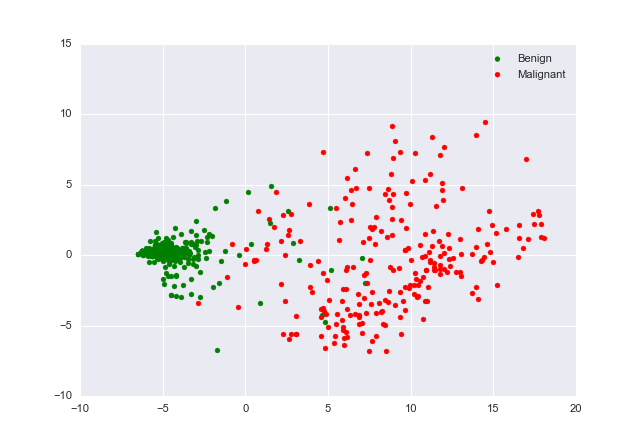

In [3]:
#This plots the original dataset using PCA
%matplotlib notebook
import matplotlib.pyplot as plt
shrink = PCA(n_components = 2)
benign_index = TUMOR_label[TUMOR_label == 2].index
malignant_index = TUMOR_label[TUMOR_label == 4].index
data_2d = shrink.fit_transform(TUMOR)
benign = data_2d[benign_index,:]
malignant = data_2d[malignant_index,:]
plt.scatter(benign[:,0],benign[:,1],color = 'g',label = "Benign")
plt.scatter(malignant[:,0],malignant[:,1],color = 'r',label = 'Malignant')
plt.legend()

In [4]:
#Split the data into test and train. Seed everywhere is 200
myseed = 250 
TUMOR_train = TUMOR.sample(frac=0.8,random_state=myseed)
"""
Here TUMOR_test is the whole dataset. We can change it to contain those points not included in train by

TUMOR_test = TUMOR.drop(TUMOR_train.index)
"""


TUMOR_test = TUMOR.copy(deep = True)

#Retriving corresponding labels for the test and train datasets
TUMOR_train_label = TUMOR_label[TUMOR_train.index]
TUMOR_test_label = TUMOR_label[TUMOR_test.index]

TUMOR_train_label[TUMOR_test_label == 2] = 1
TUMOR_train_label[TUMOR_test_label == 4] = 2
TUMOR_test_label[TUMOR_test_label == 2] = 1
TUMOR_test_label[TUMOR_test_label == 4] = 2

In [5]:
#TUMOR cateogories saved for later
TUMOR_label = ["Benign","Malignant"]

#making a dict for precision, recall, f1, accuracy
p = dict()
r = dict()
f1 = dict()
acc = dict()
method = dict()

In [6]:
#helper functions

def scatterprediction(data_2d, TUMOR_test, prediction, a, b, c,noOfClasses, start = 0,labels = None):
    ax = fig.add_subplot(a,b,c) #a,b,c  are subplot parameters
    colorplate = ['r','g','y','b','o']
    if not labels:
        labels = [i for i in range(start,noOfClasses + start)]

    for classnumber in range(start,noOfClasses+start):
        i_data_2d = np.array([data_2d[TUMOR_test.index[i]] for i in range(TUMOR_test.shape[0]) if prediction[i] == classnumber])
        ax.scatter(i_data_2d[:,0],i_data_2d[:,1],color = colorplate[classnumber - start] ,label = labels[classnumber- start])
    ax.legend(bbox_to_anchor=(1.1,1))

    return ax

#Calculating and visualizing the confusion matrix for TN TP FP FN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


def plotheatmap(labels,prediction,fig,a=1,b=1,c=1):
    ax = fig.add_subplot(a,b,c)
    confx = confusion_matrix(labels,prediction)
    sb.heatmap(confx,annot= True)
    ax.set_xticklabels(TUMOR_label)
    ax.set_yticklabels(TUMOR_label[::-1])
    return ax
#precision recall and F1 
def prf1(labels,prediction,method = ""):
    p,r,f1,_ = precision_recall_fscore_support(labels,prediction)
    acc = accuracy_score(labels,prediction)
    print "For",method
    print "           Benign       Malignant       "
    print "precision", p
    print "recall   ", r
    print "F1       ", f1
    print "Accuracy ", acc
    return p,r,f1,acc


### Kmeans for TUMOR


In [7]:
from sklearn.cluster import KMeans
kmeans_TUMOR = KMeans(n_clusters=2, random_state=myseed).fit(TUMOR_train)
cluster_assignments_TUMOR = kmeans_TUMOR.predict(TUMOR_test)
centroids = kmeans_TUMOR.cluster_centers_


<IPython.core.display.Javascript object>


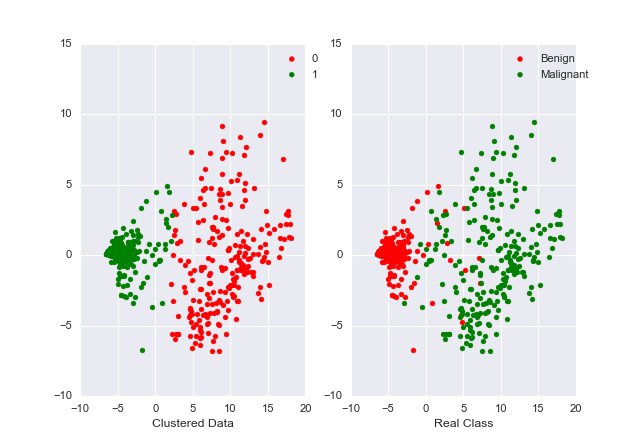

In [8]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()


ax1 = scatterprediction(data_2d,TUMOR_test,cluster_assignments_TUMOR,1,2,1,2)
ax1.set_xlabel("Clustered Data")
#Original Data
ax2 = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,1,2,2,2,start=1,labels = TUMOR_label)
ax2.set_xlabel("Real Class")


In [9]:
#Ive changed all class 2 to 1 and 4 to 2 so that the helper functions will have a easier format accorss code blocks  

cluster_assignments_TUMOR[cluster_assignments_TUMOR == 0]  = 2
cluster_assignments_TUMOR[cluster_assignments_TUMOR == 1]  = 1


In [10]:
#Saving results in Excel file: TUMOR ,sheet : Kmeans
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["Cluster"] = cluster_assignments_TUMOR
temp.to_excel(writer,sheet_name = "Kmeans")

<IPython.core.display.Javascript object>


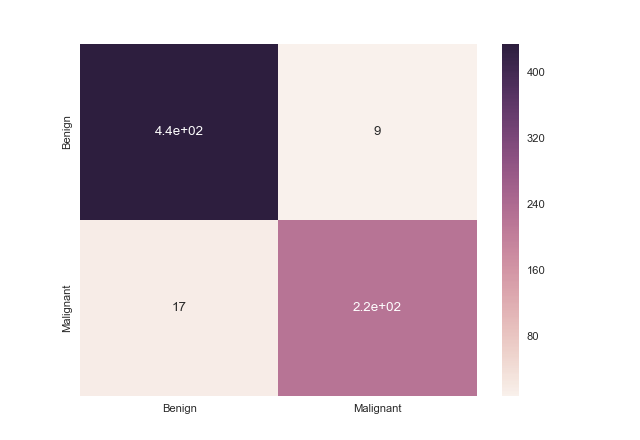

In [11]:
fig = plt.figure()

plotheatmap(TUMOR_test_label,cluster_assignments_TUMOR,fig)


In [12]:
p["K-Means"],r["K-Means"],f1["K-Means"],acc["K-Means"] = prf1(TUMOR_test_label,cluster_assignments_TUMOR,"Kmeans")

For Kmeans
           Benign       Malignant       
precision [ 0.96238938  0.96103896]
recall    [ 0.97972973  0.92887029]
F1        [ 0.97098214  0.94468085]
Accuracy  0.961932650073


###  KNN TUMOR

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#There are many explorations possible in KNN, Weights can be uniform or distance based. I'm exploring the Weights for k=5 fixed
k = 5
Knn = [1,2]
prediction = [1,2]
weights = ["uniform","distance"]
#creating different objects for different number of neighbours
for i in range(2):
    Knn[i] = KNeighborsClassifier(n_neighbors=k , weights=weights[i]).fit(TUMOR_train,TUMOR_train_label)
    prediction[i] = Knn[i].predict(TUMOR_test)
    

<IPython.core.display.Javascript object>


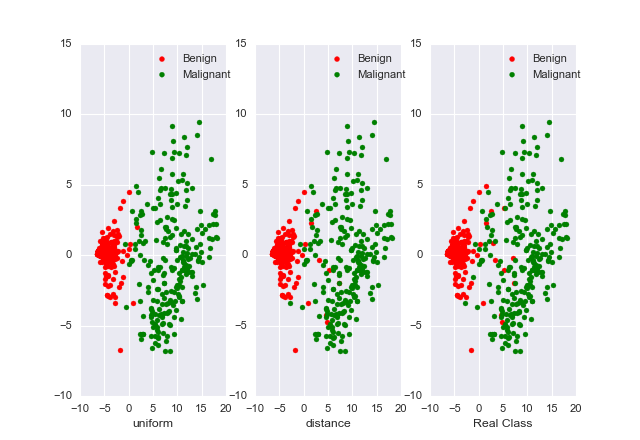

In [14]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

ax = [i for i in range(len(prediction))]
method['KNN'] = ["uniform","distance"]
for i in range(len(ax)):
    ax[i] = scatterprediction(data_2d,TUMOR_test,prediction[i],1,3,i+1,2,start = 1,labels = TUMOR_label)
    ax[i].set_xlabel(method['KNN'][i])


ax2 = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,1,3,3,2,start=1,labels = TUMOR_label)
ax2.set_xlabel("Real Class")


<IPython.core.display.Javascript object>


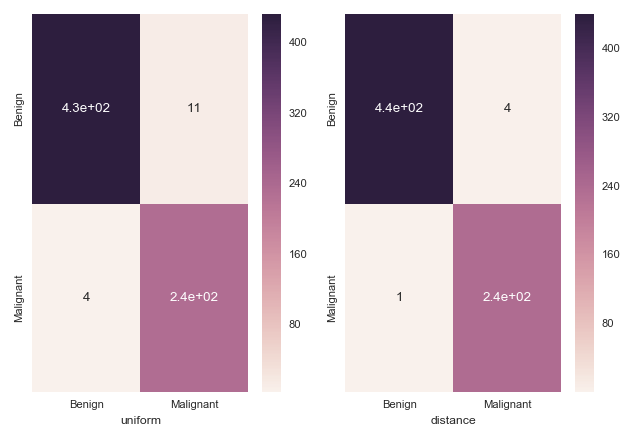

In [15]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()

ax = [i for i in range(len(prediction))]
for i in range(len(prediction)):
    temp =plotheatmap(TUMOR_test_label,prediction[i],fig,1,2,i+1)
    temp.set_xlabel(method['KNN'][i])
fig.tight_layout()

In [16]:
p["KNN"] = [i for i in range(len(prediction))]
r['KNN'] = [i for i in range(len(prediction))]
f1['KNN'] = [i for i in range(len(prediction))]
acc['KNN'] = [i for i in range(len(prediction))]
for i in range(len(prediction)):
    p["KNN"][i],r['KNN'][i],f1['KNN'][i],acc['KNN'][i] = prf1(TUMOR_test_label,prediction[i],"KNN "+method['KNN'][i])
    

For KNN uniform
           Benign       Malignant       
precision [ 0.99084668  0.95528455]
recall    [ 0.97522523  0.9832636 ]
F1        [ 0.98297389  0.96907216]
Accuracy  0.97803806735
For KNN distance
           Benign       Malignant       
precision [ 0.99773243  0.98347107]
recall    [ 0.99099099  0.9958159 ]
F1        [ 0.99435028  0.98960499]
Accuracy  0.992679355783


In [17]:
#saving results of KNN into spreadsheet KNN
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["Class_uniform"] = prediction[0]
temp["Class_distance"] = prediction[1]
temp.to_excel(writer,sheet_name = "KNN")

### Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB().fit(TUMOR_train,TUMOR_train_label)
prediction = naive.predict(TUMOR_test)


<IPython.core.display.Javascript object>


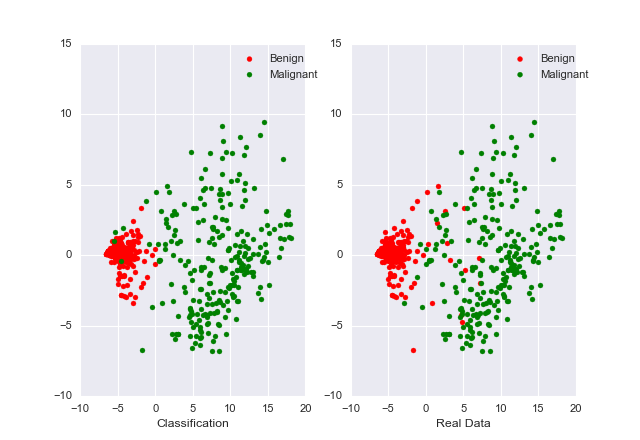

In [19]:
%matplotlib notebook
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

temp = scatterprediction(data_2d,TUMOR_test,prediction,1,2,1,2,1,labels = TUMOR_label)
temp.set_xlabel("Classification")
temp = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,1,2,2,2,1,labels = TUMOR_label)
temp.set_xlabel("Real Data")

<IPython.core.display.Javascript object>


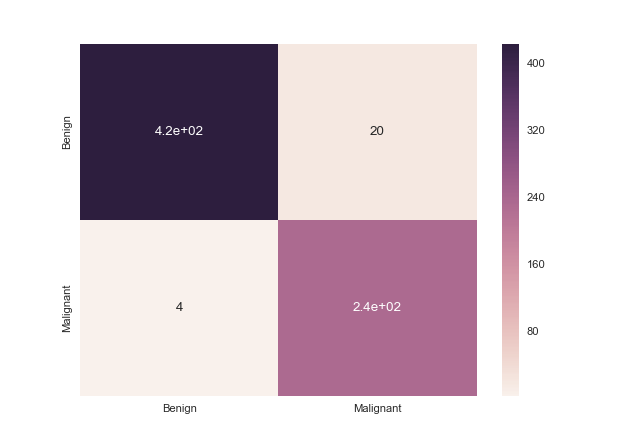

For Naive
           Benign       Malignant       
precision [ 0.99065421  0.92156863]
recall    [ 0.95495495  0.9832636 ]
F1        [ 0.97247706  0.951417  ]
Accuracy  0.96486090776


In [20]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
plotheatmap(TUMOR_test_label,prediction,fig)
p['nb'],r['nb'],f1['nb'],acc['nb'] = prf1(TUMOR_test_label,prediction,"Naive")

In [21]:
#saving results of Naive into spreadsheet Naive
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["Classification"] = prediction
temp.to_excel(writer,sheet_name = "Naive")

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1e5).fit(TUMOR_train,TUMOR_train_label)
prediction = logistic.predict(TUMOR_test)

<IPython.core.display.Javascript object>


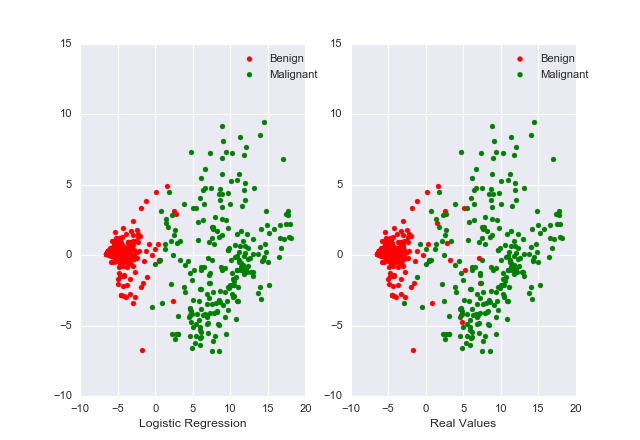

In [23]:
%matplotlib notebook
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = scatterprediction(data_2d,TUMOR_test,prediction,1,2,1,2,start = 1,labels = TUMOR_label)
ax1.set_xlabel("Logistic Regression")
ax2 = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,1,2,2,2,start = 1,labels = TUMOR_label)
ax2.set_xlabel("Real Values")


<IPython.core.display.Javascript object>


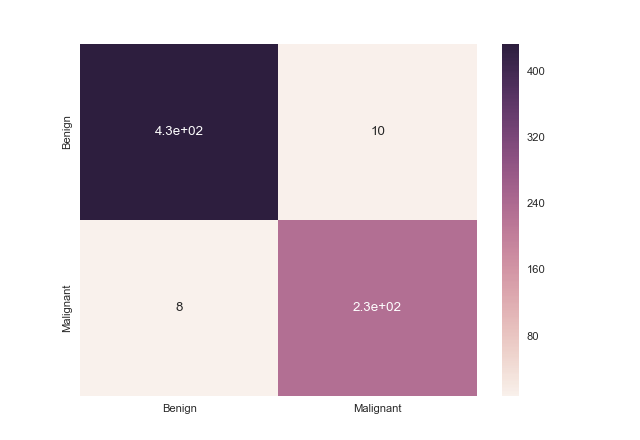

In [24]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
plotheatmap(TUMOR_test_label,prediction,fig)

In [25]:
#F1 score and accuracy for prediction vs actual
p['l'],r['l'],f1['l'],acc['l'] = prf1(TUMOR_test_label,prediction,"Logistic Regression")

For Logistic Regression
           Benign       Malignant       
precision [ 0.98190045  0.95850622]
recall    [ 0.97747748  0.9665272 ]
F1        [ 0.97968397  0.9625    ]
Accuracy  0.97364568082


In [26]:
#saving results of Naive into spreadsheet Naive
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["Classification"] = prediction
temp.to_excel(writer,sheet_name = "logistic")

### Neural Network Classifier

In [27]:
from sklearn.neural_network import MLPClassifier
neuralrelu = MLPClassifier(hidden_layer_sizes=(20,),activation="relu",alpha=0.001,max_iter=800,random_state=myseed).fit(TUMOR_train,TUMOR_train_label)
neuralsig = MLPClassifier(hidden_layer_sizes=(20,),activation="logistic",alpha=0.001,max_iter=800,random_state=myseed).fit(TUMOR_train,TUMOR_train_label)
prediction = [1,2]
prediction[0] = neuralrelu.predict(TUMOR_test)
prediction[1] = neuralsig.predict(TUMOR_test)

<IPython.core.display.Javascript object>


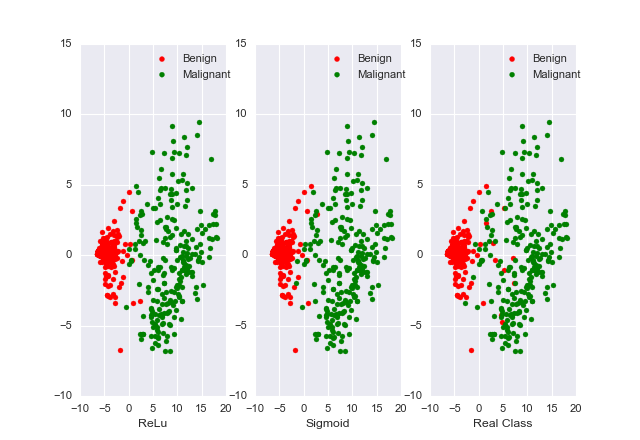

In [28]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
method['nn'] = ["ReLu","Sigmoid"]
for i in range(len(prediction)):
    ax = scatterprediction(data_2d,TUMOR_test,prediction[i],1,3,i+1,2,1,labels = TUMOR_label)
    ax.set_xlabel(method['nn'][i])
ax = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,1,3,3,2,1,labels = TUMOR_label)
ax.set_xlabel("Real Class")


<IPython.core.display.Javascript object>


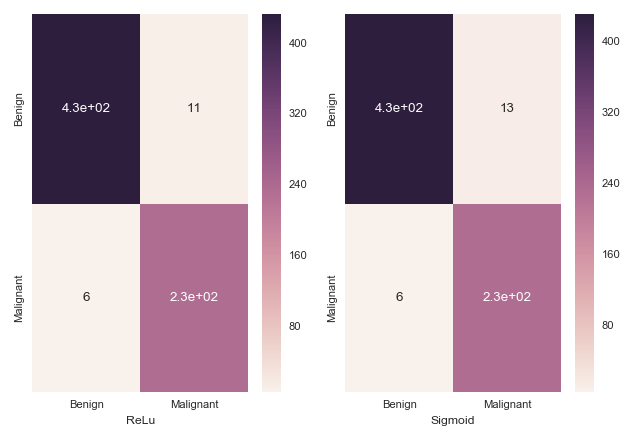

In [29]:
%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
for i in range((len(prediction))):
    ax = plotheatmap(TUMOR_test_label,prediction[i],fig,1,2,i+1)
    ax.set_xlabel(method['nn'][i])
fig.tight_layout()

In [30]:
#F1 score and accuracy for prediction vs actual
p['nn'] = [i for i in range(len(prediction))]
r['nn'] = [i for i in range(len(prediction))]
f1['nn'] = [i for i in range(len(prediction))]
acc['nn'] = [i for i in range(len(prediction))]

for i in range(len(prediction)):
    p['nn'][i],r['nn'][i],f1['nn'][i],acc['nn'][i] = prf1(TUMOR_test_label,prediction[i],"NN "+method['nn'][i])


For NN ReLu
           Benign       Malignant       
precision [ 0.98633257  0.95491803]
recall    [ 0.97522523  0.9748954 ]
F1        [ 0.98074745  0.96480331]
Accuracy  0.975109809663
For NN Sigmoid
           Benign       Malignant       
precision [ 0.98627002  0.94715447]
recall    [ 0.97072072  0.9748954 ]
F1        [ 0.9784336   0.96082474]
Accuracy  0.972181551977


In [31]:
#saving results of NN into spreadsheet NN
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["Class_relu"] = prediction[0]
temp["Class_sigmoid"] = prediction[1]
temp.to_excel(writer,sheet_name = "NN")

### Support Vector Machine

In [32]:
from sklearn import svm
C = 1.0                                    # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(TUMOR_train, TUMOR_train_label)         #fitting a straight hyperplane
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(TUMOR_train, TUMOR_train_label)   #transform via rbf kernal and then fit
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(TUMOR_train, TUMOR_train_label)   #3rd degree polynomial
lin_svc = svm.LinearSVC(C=C).fit(TUMOR_train, TUMOR_train_label)                     #differes in the error function. 
                                                                                    #It minimizes the squared hinge loss
method['svm'] = ["Linear","rbf","poly","LinSVM"]
prediction = [1,2,3,4]
prediction[0] = svc.predict(TUMOR_test)
prediction[1] = rbf_svc.predict(TUMOR_test)
prediction[2] = poly_svc.predict(TUMOR_test)
prediction[3] = lin_svc.predict(TUMOR_test)


<IPython.core.display.Javascript object>


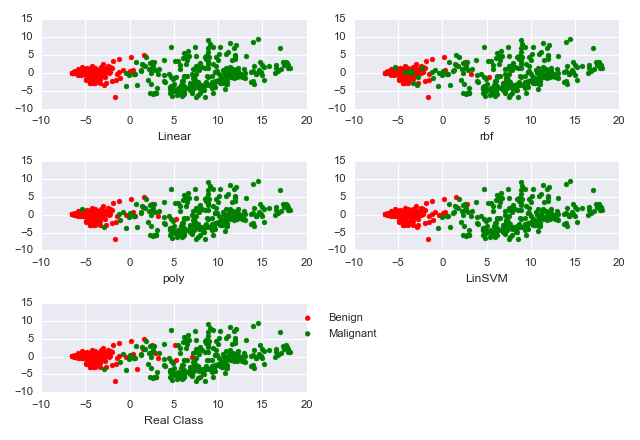

In [33]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(len(prediction)):
    ax = scatterprediction(data_2d,TUMOR_test,prediction[i],3,2,i+1,2,1)
    ax.set_xlabel(method['svm'][i])
    ax.legend([])
    #Classification data linear kernel

ax = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,3,2,5,2,1,labels=TUMOR_label)
ax.set_xlabel("Real Class")
ax.legend(bbox_to_anchor=(1.3,1.))
fig.tight_layout()

<IPython.core.display.Javascript object>


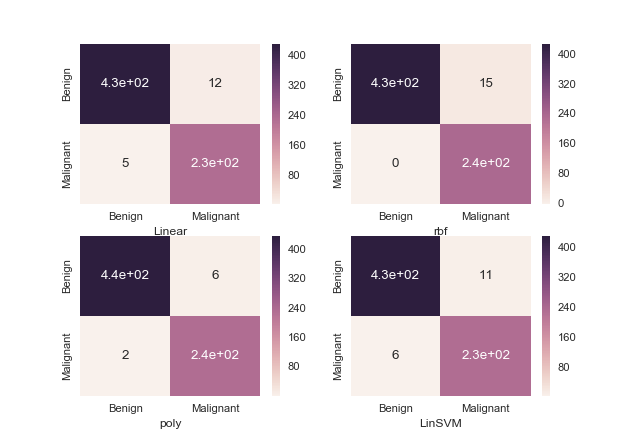

In [34]:
from sklearn.metrics import confusion_matrix

%matplotlib notebook
#Calculating and visualizing the confusion matrix for TN TP FP FN
fig = plt.figure()
for i in range(len(prediction)):
    ax = plotheatmap(TUMOR_test_label,prediction[i],fig,2,2,i+1)
    ax.set_xlabel(method['svm'][i])


In [35]:
#F1 score and accuracy for prediction vs actual
p['svm'] = [i for i in range(len(prediction))]
r['svm'] = [i for i in range(len(prediction))]
f1['svm'] = [i for i in range(len(prediction))]
acc['svm'] = [i for i in range(len(prediction))]

for i in range(len(prediction)):
    p['svm'][i],r['svm'][i],f1['svm'][i],acc['svm'][i] = prf1(TUMOR_test_label,prediction[i],"SVM "+method['svm'][i])


For SVM Linear
           Benign       Malignant       
precision [ 0.98855835  0.95121951]
recall    [ 0.97297297  0.9790795 ]
F1        [ 0.98070375  0.96494845]
Accuracy  0.975109809663
For SVM rbf
           Benign       Malignant       
precision [ 1.          0.94094488]
recall    [ 0.96621622  1.        ]
F1        [ 0.98281787  0.96957404]
Accuracy  0.97803806735
For SVM poly
           Benign       Malignant       
precision [ 0.99545455  0.97530864]
recall    [ 0.98648649  0.9916318 ]
F1        [ 0.99095023  0.98340249]
Accuracy  0.988286969253
For SVM LinSVM
           Benign       Malignant       
precision [ 0.98633257  0.95491803]
recall    [ 0.97522523  0.9748954 ]
F1        [ 0.98074745  0.96480331]
Accuracy  0.975109809663


In [36]:
#saving results of NN into spreadsheet NN
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["Class_linear"] = prediction[0]
temp["Class_rbf"] = prediction[1]
temp["Class_poly"] = prediction[2]
temp["Class_linearSVC"] = prediction[3]
temp.to_excel(writer,sheet_name = "SVM")

### DBSCAN for TUMOR clustering

In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
dbscan = DBSCAN(eps = 1, min_samples=3).fit(TUMOR_test)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
cluster_assignments_TUMOR = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_assignments_TUMOR)) - (1 if -1 in cluster_assignments_TUMOR else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(TUMOR_test_label, cluster_assignments_TUMOR))
print("Completeness: %0.3f" % metrics.completeness_score(TUMOR_test_label,cluster_assignments_TUMOR))
print("V-measure: %0.3f" % metrics.v_measure_score(TUMOR_test_label, cluster_assignments_TUMOR))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(TUMOR_test_label, cluster_assignments_TUMOR))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(TUMOR_test_label, cluster_assignments_TUMOR))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(TUMOR_test, cluster_assignments_TUMOR))

Estimated number of clusters: 2
Homogeneity: 0.521
Completeness: 0.458
V-measure: 0.488
Adjusted Rand Index: 0.463
Adjusted Mutual Information: 0.457
Silhouette Coefficient: 0.184


In [38]:
# shifting cluster naming appropriately 
cluster_assignments_TUMOR[cluster_assignments_TUMOR == 1] = 2
cluster_assignments_TUMOR[cluster_assignments_TUMOR == 0] = 1
#labelling it as an outlier with higher value than number of classes!. -1 as class breaks my heatmap function
cluster_assignments_TUMOR[cluster_assignments_TUMOR == -1] = 100

<IPython.core.display.Javascript object>


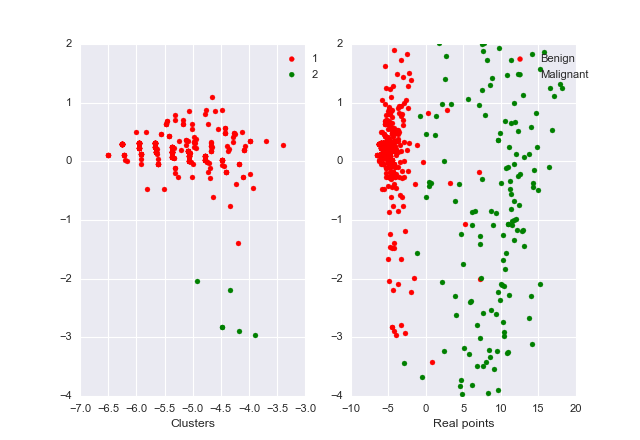

(-4.0, 2.0)

In [39]:
#Plotting the results
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

ax = scatterprediction(data_2d,TUMOR_test,cluster_assignments_TUMOR,1,2,1,2,1)
ax.set_xlabel("Clusters")
ymin, ymax = plt.gca().get_ylim()
ax1 = scatterprediction(data_2d,TUMOR_test,TUMOR_test_label,1,2,2,2,1,labels =TUMOR_label )
ax1.set_xlabel("Real points")
ax1.set_ylim([ymin, ymax])

<IPython.core.display.Javascript object>


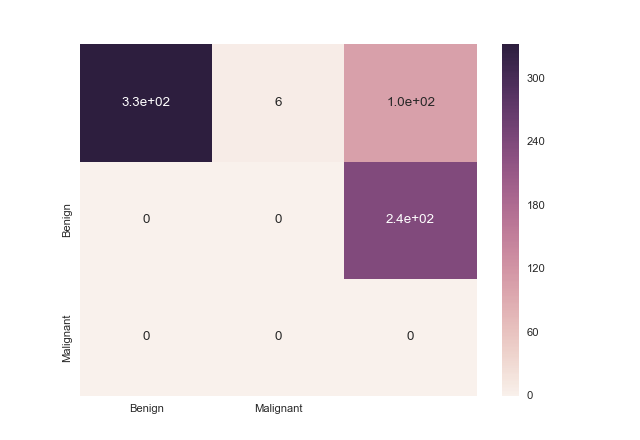

In [40]:
plotheatmap(TUMOR_test_label,cluster_assignments_TUMOR,plt.figure(),1,1,1)

In [41]:
p['db'],r['db'],f1['db'],acc['db'] = prf1(TUMOR_test_label,cluster_assignments_TUMOR,"DBSCAN")

For DBSCAN
           Benign       Malignant       
precision [ 1.  0.  0.]
recall    [ 0.75  0.    0.  ]
F1        [ 0.85714286  0.          0.        ]
Accuracy  0.487554904832


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
#saving results of DBSCAN into spreadsheet DBSCAN
temp = TUMOR_test.copy(deep=True)
temp['Class'] = TUMOR_test_label
temp["cluster"] = cluster_assignments_TUMOR
temp.to_excel(writer,sheet_name = "DBSCAN")

In [43]:
writer.save()

In [44]:
writem = pd.ExcelWriter("G:/E/ML/metrics.xlsx")
features = ["precision","recall","f1","accuracy"]
allalgos = []
algorithms = ["K-Means","KNN","nb","l","nn","svm","db"]

for i in features:
    print "\t\t",i, "\t",
print
for i in range(len(algorithms)):
    if type(p[algorithms[i]]) != list:
        allalgos.append(algorithms[i])
        print algorithms[i],"\t",
        print p[algorithms[i]].mean(),"\t\t",
        print r[algorithms[i]].mean(),"\t\t",
        print f1[algorithms[i]].mean(),"\t\t",
        print acc[algorithms[i]]

    else:
        for index,item in enumerate(method[algorithms[i]]):
            allalgos.append(algorithms[i]+item)
            print algorithms[i],item,"\t",
            print p[algorithms[i]][index].mean(),"\t\t",
            print r[algorithms[i]][index].mean(),"\t\t",
            print f1[algorithms[i]][index].mean(),"\t\t",
            print acc[algorithms[i]][index]

d = np.zeros((len(allalgos),len(features)))
rowno = 0
for i in range(len(algorithms)):
    if type(p[algorithms[i]]) != list:
        d[rowno][0] = p[algorithms[i]].mean()
        d[rowno][1] = r[algorithms[i]].mean()
        d[rowno][2] = f1[algorithms[i]].mean()
        d[rowno][3] = acc[algorithms[i]]
        rowno +=1

    else:
        for index,item in enumerate(method[algorithms[i]]):
            d[rowno][0] = p[algorithms[i]][index].mean()
            d[rowno][1] = r[algorithms[i]][index].mean()
            d[rowno][2] = f1[algorithms[i]][index].mean()
            d[rowno][3] = acc[algorithms[i]][index]
            rowno +=1

stats = pd.DataFrame(d,columns=features)
stats["Algorithms"] = allalgos
stats.to_excel(writem,sheet_name="TUMOR")
writem.save()

		precision 			recall 			f1 			accuracy 	
K-Means 	0.961714170785 		0.954300011308 		0.95783149696 		0.961932650073
KNN uniform 	0.973065617384 		0.979244411776 		0.976023029126 		0.97803806735
KNN distance 	0.990601750342 		0.993403445286 		0.991977636045 		0.992679355783
nb 	0.956111416529 		0.969109276641 		0.961947034134 		0.96486090776
l 	0.970203338278 		0.972002337065 		0.971091986456 		0.97364568082
nn ReLu 	0.970625303409 		0.975060311357 		0.972775382249 		0.975109809663
nn Sigmoid 	0.966712247214 		0.972808059105 		0.969629170226 		0.972181551977
svm Linear 	0.969888932299 		0.97602623544 		0.972826099676 		0.975109809663
svm rbf 	0.970472440945 		0.983108108108 		0.976195952963 		0.97803806735
svm poly 	0.985381593715 		0.989059142825 		0.987176357935 		0.988286969253
svm LinSVM 	0.970625303409 		0.975060311357 		0.972775382249 		0.975109809663
db 	0.333333333333 		0.25 		0.285714285714 		0.487554904832


Saving every change to writer object